In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from sklearn.model_selection import train_test_split
import pandas as pd

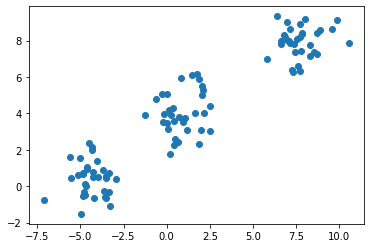

In [ ]:
# generate dataset
X, y = sklearn.datasets.make_blobs(n_samples=100, n_features=2, random_state=3)
plt.scatter(x=X[:, 0], y=X[:, 1], cmap=plt.cm.Spectral)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
#assign each point its closest centroids 
def clustering(centroids, X):
  cluster = []
  for i in range(n_samples):
    distances = []

    # calculate the distance between a point to all k centroids, find the closest centroids
    for j in range(len(centroids)):
      distance_j = np.sqrt((X.iloc[i][0] - centroids.iloc[j][0]) ** 2 + (X.iloc[i][1] - centroids.iloc[j][1]) ** 2)
      distances.append((distance_j, j))
      sorted_d = sorted(distances)
    cluster.append(sorted_d[0][1])

  df_cluster = pd.DataFrame(data=cluster, columns=['cluster'])
  new_X = pd.concat([X, df_cluster], axis=1)
  return new_X

In [ ]:
def k_means(X, k, iters):
  # random initialize k centroids
  n_samples = len(X)
  np.random.seed(3)
  centroids = X.loc[np.random.randint(0, n_samples, k)]
  cost_history = []

  for i in range(iters):
    X_cluster = clustering(centroids, X)
    # calculate cost: sum of Eucliean distance between each point and the its centroid
    cost = 0
    for j in range(n_samples):
      clu = int(X_cluster.iloc[j]['cluster'])
      cost += np.sqrt((X_cluster.iloc[j][0] - centroids.iloc[clu][0])**2 + (X_cluster.iloc[j][1] - centroids.iloc[clu][1])**2)
    cost_history.append(cost)

    # update centroid
    centroids = X_cluster.groupby(['cluster']).mean()
  
  plt.scatter(x=X_cluster[0], y=X_cluster[1], c=X_cluster['cluster'])
  plt.scatter(x=centroids[0], y=centroids[1])
  return X_cluster, cost_history

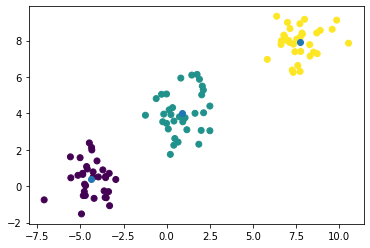

In [ ]:
X_cluster, cost_history = k_means(X, k=3, iters=10)

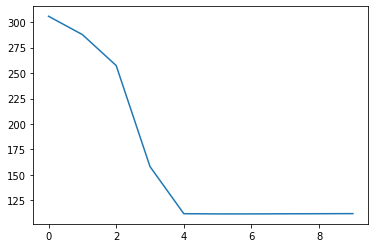

In [ ]:
plt.plot(np.arange(10), cost_history)

In [ ]:
cost_history

[663.7787970572543,
 307.26890258823977,
 292.83440315954294,
 264.8575646794877,
 152.18657215154917,
 119.902708903458,
 119.902708903458,
 119.902708903458,
 119.902708903458,
 119.902708903458]